# **Exploratory Data Analysis (EDA) for News Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn wordcloud -q

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import missingno as msno
import re

## **Visualization data before processing**

In [ ]:
# -----------------------------
# 1. Load dataset
# -----------------------------
file_path = "/content/drive/MyDrive/KLTN_2025/KLTN/data/Data_news_raw.xlsx"
df = pd.read_excel(file_path)


In [ ]:
# -----------------------------
# 2. Basic information
# -----------------------------
# Basic information
print("Dataset information:")
print(df.info())

# Display the first 5 rows in horizontal format
print("\nFirst 5 rows:")
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 1000)         # adjust the width
display(df.head())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12092 entries, 0 to 12091
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12092 non-null  int64 
 1   title    12091 non-null  object
 2   content  12062 non-null  object
 3   link     12092 non-null  object
 4   date     11354 non-null  object
dtypes: int64(1), object(4)
memory usage: 472.5+ KB
None

First 5 rows:


,id,title,content,link,date
0,1,Nợ xấu ngân hàng trên 4%,"Tính đến tháng 1/2025, tỷ lệ nợ xấu nội bảng t...",https://vnexpress.net/ty-le-no-xau-noi-bang-cu...,"Tue, 20 May 2025 00:07:28 +0700"
1,2,Đồng minh loay hoay tìm cách đạt thỏa thuận th...,Mỹ đạt thỏa thuận nhanh chóng với Trung ...,https://vnexpress.net/dong-minh-loay-hoay-tim-...,"Mon, 19 May 2025 17:00:02 +0700"
2,3,Điểm kinh doanh vàng miếng tại TP HCM phải tre...,Các điểm kinh doanh vàng miếng tại TP HCM phải...,https://vnexpress.net/diem-kinh-doanh-vang-mie...,"Mon, 19 May 2025 16:43:46 +0700"
3,4,Chứng khoán lại mất mốc 1.300 điểm,Áp lực chốt lời mạnh lên khiến VN-Index giảm p...,https://vnexpress.net/chung-khoan-lai-mat-moc-...,"Mon, 19 May 2025 15:56:19 +0700"
4,5,"Đề xuất TP HCM, Hải Phòng, Đà Nẵng được tiếp t...","Hải Phòng, Đà Nẵng, Khánh Hòa, TP HCM và Cần T...",https://vnexpress.net/de-xuat-tp-hcm-hai-phong...,"Mon, 19 May 2025 13:42:13 +0700"


In [ ]:
# -----------------------------
# 3. Check missing data
# -----------------------------
print("\nNumber of missing values per column:")
print(df.isnull().sum())



Number of missing values per column:
id           0
title        1
content     30
link         0
date       738
dtype: int64


In [ ]:
# 3. Percentage of missing data
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing data (%):")
print(missing_percent)


Percentage of missing data (%):
id                0.000000
title             0.008270
content           0.248098
link              0.000000
date              6.103209
title_length      0.000000
content_length    0.000000
dtype: float64


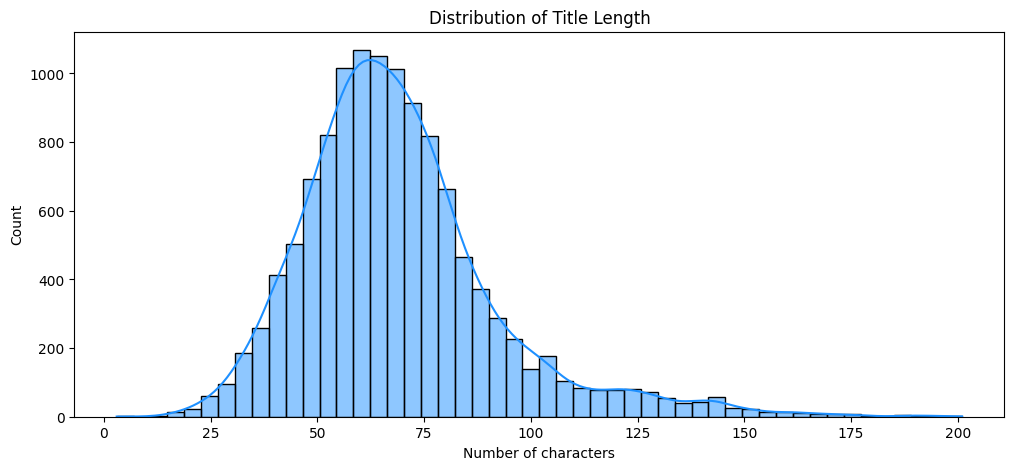

In [ ]:
# -----------------------------
# 4. Basic statistics for text columns
# -----------------------------
df['title_length'] = df['title'].astype(str).apply(len)
df['content_length'] = df['content'].astype(str).apply(len)

plt.figure(figsize=(12,5))
sns.histplot(df['title_length'], bins=50, kde=True, color='dodgerblue')
plt.title("Distribution of Title Length")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()


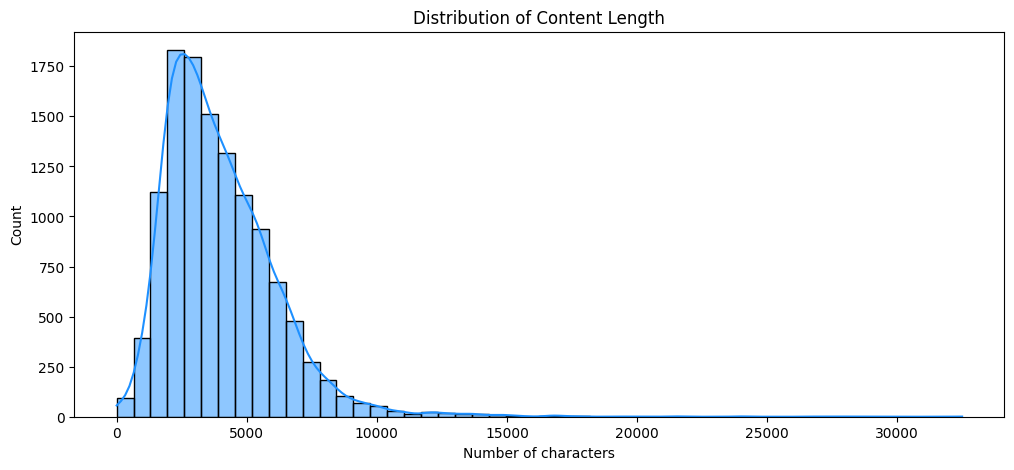

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['content_length'], bins=50, kde=True, color='dodgerblue')
plt.title("Distribution of Content Length")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

## **Visualization data after processing**

### News data with the title column

In [ ]:
# 1. Load dataset
file_v1 = "/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news_v1.xlsx"
df_v1 = pd.read_excel(file_v1, sheet_name="Version1_full")

In [ ]:
# 2. Preprocessing: compute title lengths
df_v1['title_word_count'] = df_v1['title'].astype(str).apply(lambda x: len(x.split()))
df_v1['title_char_count'] = df_v1['title'].astype(str).apply(len)

print("\nTitle length columns added. Sample:")
display(df_v1[['title','title_word_count','title_char_count']].head())


Title length columns added. Sample:


,title,title_word_count,title_char_count
0,Nợ xấu ngân hàng trên 4%,6,24
1,Đồng minh loay hoay tìm cách đạt thỏa thuận th...,12,55
2,Điểm kinh doanh vàng miếng tại TP HCM phải tre...,13,62
3,Chứng khoán lại mất mốc 1.300 điểm,7,34
4,"Đề xuất TP HCM, Hải Phòng, Đà Nẵng được tiếp t...",18,76


In [ ]:
# 3. Title statistics
# -----------------------------
title_stats = df_v1[['title_word_count','title_char_count']].describe()
print("\nTitle statistics:")
display(title_stats)


Title statistics:


,title_word_count,title_char_count
count,5179.000000,5179.000000
mean,15.038424,68.204673
std,5.036394,22.986288
min,4.000000,17.000000
25%,12.000000,53.000000
50%,14.000000,66.000000
75%,17.000000,79.000000
max,41.000000,194.000000


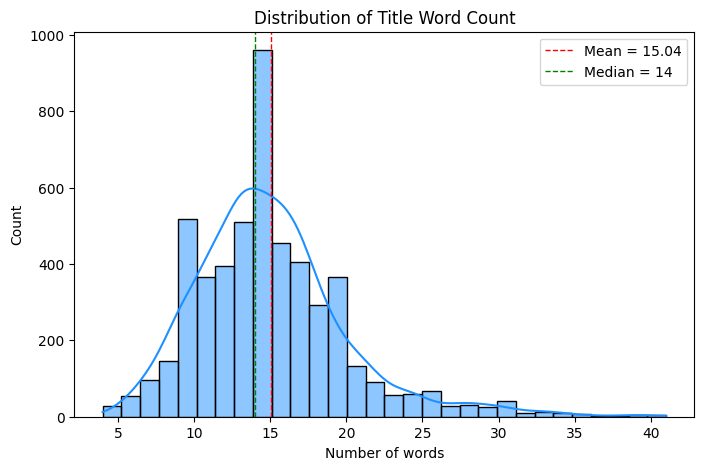

In [ ]:
# 4. Title word count visualization
plt.figure(figsize=(8,5))
sns.histplot(df_v1['title_word_count'], bins=30, kde=True, color='dodgerblue')

# Calculate mean and median
mean_word = df_v1['title_word_count'].mean()
median_word = df_v1['title_word_count'].median()

# Add vertical lines
plt.axvline(mean_word, color='red', linestyle='--', linewidth=1, label=f"Mean = {mean_word:.2f}")
plt.axvline(median_word, color='green', linestyle='--', linewidth=1, label=f"Median = {median_word:.0f}")

plt.title("Distribution of Title Word Count")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.legend()
plt.show()


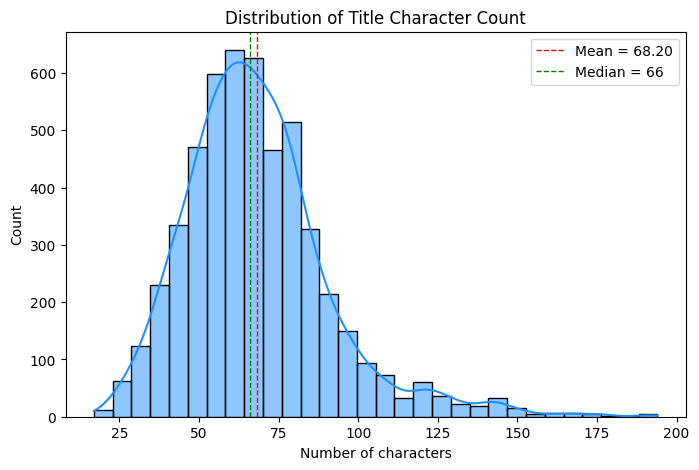

In [ ]:
# 5. Title character count visualization
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df_v1['title_char_count'], bins=30, kde=True, color='dodgerblue')

# Calculate mean and median
mean_chars = df_v1['title_char_count'].mean()
median_chars = df_v1['title_char_count'].median()

# Add vertical lines
plt.axvline(mean_chars, color='red', linestyle='--', linewidth=1, label=f"Mean = {mean_chars:.2f}")
plt.axvline(median_chars, color='green', linestyle='--', linewidth=1, label=f"Median = {median_chars:.0f}")

plt.title("Distribution of Title Character Count")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.legend()
plt.show()

### News data with the summary column

In [ ]:
file_final = "/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news_final.xlsx"
df_final = pd.read_excel(file_final)


In [ ]:
# 2. Preprocessing: compute lengths
df_final['summary_word_count'] = df_final['summary'].astype(str).apply(lambda x: len(x.split()))
df_final['summary_char_count'] = df_final['summary'].astype(str).apply(len)

print("\nSummary length columns added. Sample:")
display(df_final[['summary', 'summary_word_count', 'summary_char_count']].head())


Summary length columns added. Sample:


,summary,summary_word_count,summary_char_count
0,"Đến tháng 1/2025, nợ xấu nội bảng toàn ngành n...",107,469
1,Mỹ đã đạt thỏa thuận nhanh với Anh và Trung Qu...,124,542
2,NHNN yêu cầu các điểm kinh doanh vàng miếng tạ...,101,481
3,"VN-Index giảm phiên thứ hai liên tiếp, thủng m...",96,451
4,"Chính phủ đề xuất Quốc hội cho phép Hải Phòng,...",148,691


In [ ]:
# 3. Summary statistics
summary_stats = df_final[['summary_word_count', 'summary_char_count']].describe()
print("\nSummary statistics:")
display(summary_stats)



Summary statistics:


,summary_word_count,summary_char_count
count,12007.000000,12007.000000
mean,109.045640,503.058133
std,17.141587,78.676424
min,23.000000,98.000000
25%,99.000000,455.000000
50%,107.000000,492.000000
75%,117.000000,539.000000
max,205.000000,967.000000


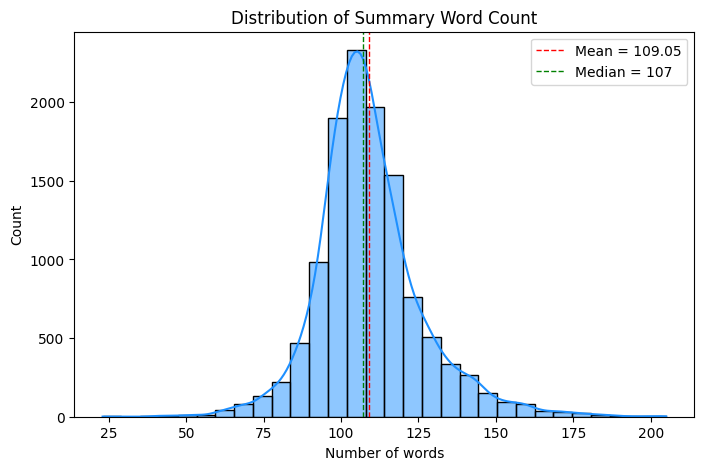

In [ ]:
# 4. Summary word count visualization
plt.figure(figsize=(8,5))
sns.histplot(df_final['summary_word_count'], bins=30, kde=True, color='dodgerblue')

# Calculate mean and median
mean_word = df_final['summary_word_count'].mean()
median_word = df_final['summary_word_count'].median()

# Add vertical lines
plt.axvline(mean_word, color='red', linestyle='--', linewidth=1, label=f"Mean = {mean_word:.2f}")
plt.axvline(median_word, color='green', linestyle='--', linewidth=1, label=f"Median = {median_word:.0f}")

plt.title("Distribution of Summary Word Count")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.legend()
plt.show()


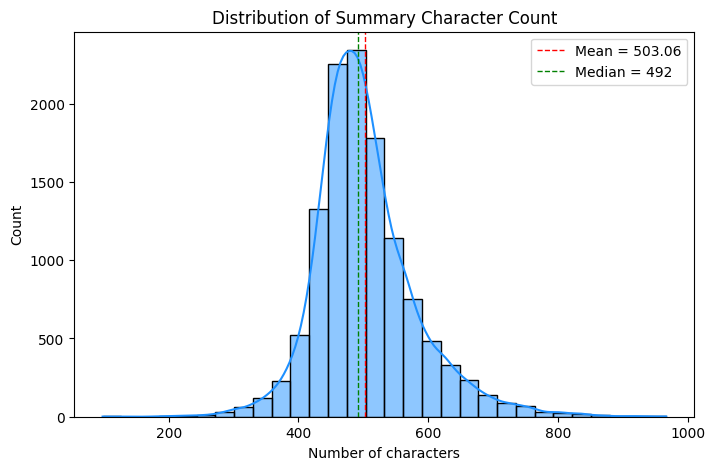

In [ ]:
# 5. Summary character count visualization
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df_final['summary_char_count'], bins=30, kde=True, color='dodgerblue')

# Calculate mean and median
mean_chars = df_final['summary_char_count'].mean()
median_chars = df_final['summary_char_count'].median()

# Add vertical lines
plt.axvline(mean_chars, color='red', linestyle='--', linewidth=1, label=f"Mean = {mean_chars:.2f}")
plt.axvline(median_chars, color='green', linestyle='--', linewidth=1, label=f"Median = {median_chars:.0f}")

plt.title("Distribution of Summary Character Count")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.legend()
plt.show()


### News data with all column

In [ ]:
# Load the data from Google Drive (replace 'path_to_your_file' with the actual path to your Excel file in Google Drive)
file_path = '/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news_final.xlsx'
data = pd.read_excel(file_path)

In [ ]:
# View the total number of rows in the dataset
total_rows = len(data)
print(f"Total number of rows in the dataset: {total_rows}")

# View the first 6 rows of the dataset
print("First 6 rows of the dataset:")
display(data.head(6))

Total number of rows in the dataset: 12007
First 6 rows of the dataset:


,stt,title,link,published,source,content,summary,industry,sentiment
0,1,Nợ xấu ngân hàng trên 4%,https://vnexpress.net/ty-le-no-xau-noi-bang-cu...,"Tue, 20 May 2025 00:07:28 +0700",VnExpress-KinhDoanh,"Tính đến tháng 1/2025, tỷ lệ nợ xấu nội bảng t...","Đến tháng 1/2025, nợ xấu nội bảng toàn ngành n...",Finance,Negative
1,2,Đồng minh loay hoay tìm cách đạt thỏa thuận th...,https://vnexpress.net/dong-minh-loay-hoay-tim-...,"Mon, 19 May 2025 17:00:02 +0700",VnExpress-KinhDoanh,Mỹ đạt thỏa thuận nhanh chóng với Trung ...,Mỹ đã đạt thỏa thuận nhanh với Anh và Trung Qu...,Other,Neutral
2,3,Điểm kinh doanh vàng miếng tại TP HCM phải tre...,https://vnexpress.net/diem-kinh-doanh-vang-mie...,"Mon, 19 May 2025 16:43:46 +0700",VnExpress-KinhDoanh,Các điểm kinh doanh vàng miếng tại TP HCM phải...,NHNN yêu cầu các điểm kinh doanh vàng miếng tạ...,Finance,Neutral
3,4,Chứng khoán lại mất mốc 1.300 điểm,https://vnexpress.net/chung-khoan-lai-mat-moc-...,"Mon, 19 May 2025 15:56:19 +0700",VnExpress-KinhDoanh,Áp lực chốt lời mạnh lên khiến VN-Index giảm p...,"VN-Index giảm phiên thứ hai liên tiếp, thủng m...",Finance,Negative
4,5,"Đề xuất TP HCM, Hải Phòng, Đà Nẵng được tiếp t...",https://vnexpress.net/de-xuat-tp-hcm-hai-phong...,"Mon, 19 May 2025 13:42:13 +0700",VnExpress-KinhDoanh,"Hải Phòng, Đà Nẵng, Khánh Hòa, TP HCM và Cần T...","Chính phủ đề xuất Quốc hội cho phép Hải Phòng,...",Finance,Positive
5,6,Hoạt động kinh tế của Trung Quốc chậm lại,https://vnexpress.net/hoat-dong-kinh-te-cua-tr...,"Mon, 19 May 2025 12:13:50 +0700",VnExpress-KinhDoanh,"Doanh số bán lẻ, sản lượng công nghiệp và ...","Doanh số bán lẻ, sản lượng công nghiệp và đầu ...",Finance,Negative


1. Statistics of content column length (characters):
min         107.000000
max       31921.000000
mean       3782.972016
median     3392.000000
Name: content_length, dtype: float64



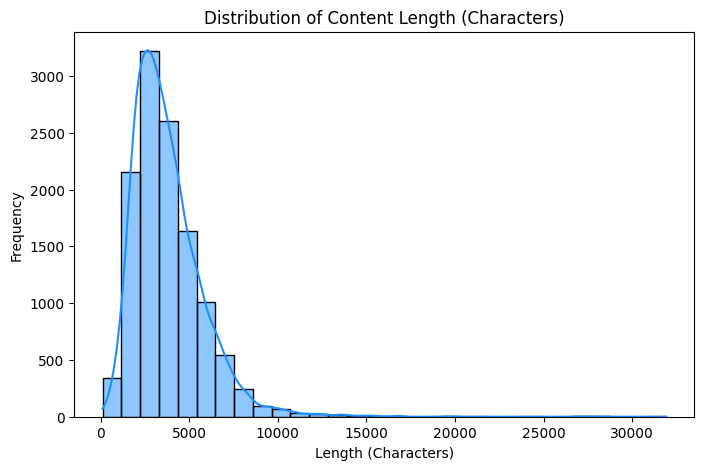

In [ ]:
# 1. General statistics of the dataset - Content column length
data['content_length'] = data['content'].str.len()
stats = data['content_length'].agg(['min', 'max', 'mean', 'median'])
print("1. Statistics of content column length (characters):")
print(stats)
print()

# Visualize the distribution of content length with a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['content_length'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Content Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

1. Statistics of summary column length (characters):
min        98.000000
max       967.000000
mean      503.058133
median    492.000000
Name: summary_length, dtype: float64



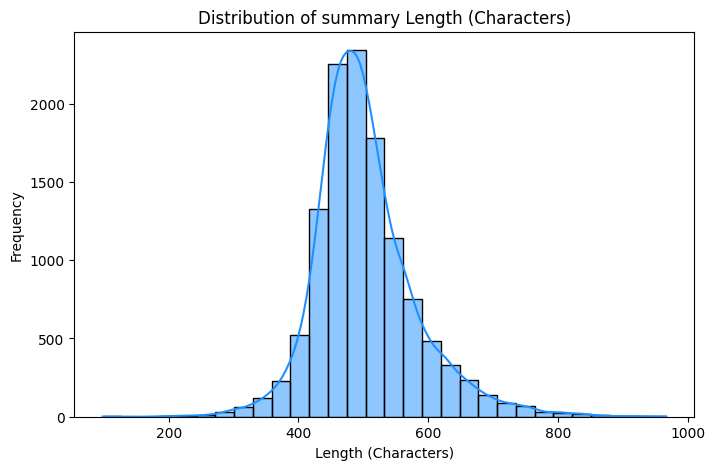

In [ ]:
# General statistics of the dataset - summary column length
data['summary_length'] = data['summary'].str.len()
stats = data['summary_length'].agg(['min', 'max', 'mean', 'median'])
print("1. Statistics of summary column length (characters):")
print(stats)
print()

# Visualize the distribution of content length with a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['summary_length'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of summary Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()

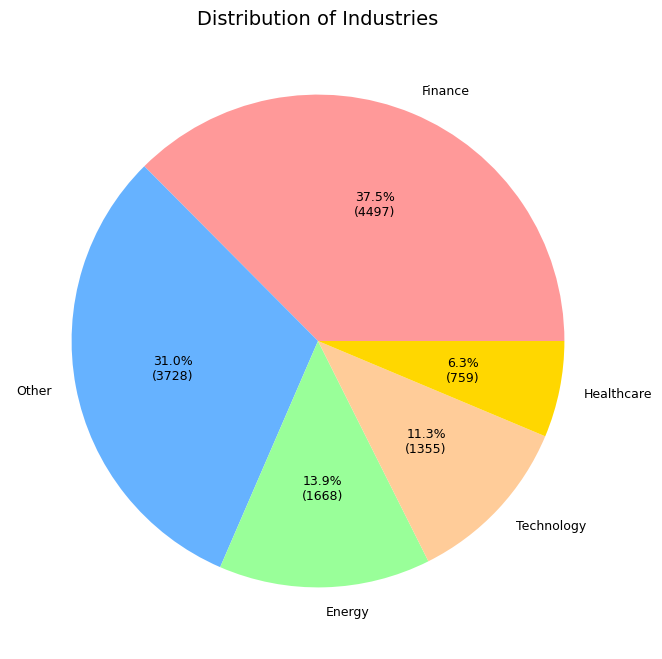

In [ ]:
# 2. Industry label distribution
industry_counts = data['industry'].value_counts()

# Custom autopct: show % and count
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(8, 8))
plt.pie(
    industry_counts,
    labels=industry_counts.index,
    autopct=lambda pct: autopct_format(pct, industry_counts),
    colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700'],
    textprops={'fontsize': 9}
)
plt.title('Distribution of Industries', fontsize=14)
plt.show()


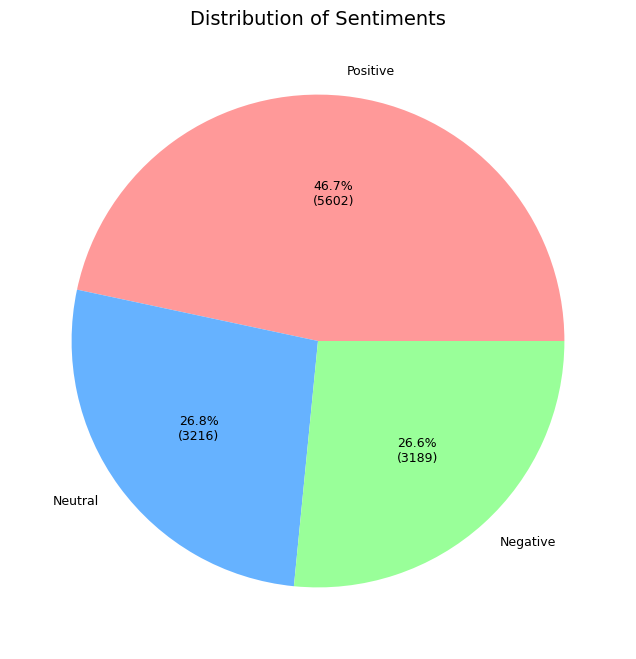

In [ ]:
# 3. Sentiment label distribution
sentiment_counts = data['sentiment'].value_counts()

# Custom autopct: show % and count
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda pct: autopct_format(pct, sentiment_counts),
    colors=['#FF9999', '#66B2FF', '#99FF99'],
    textprops={'fontsize': 9}
)
plt.title('Distribution of Sentiments', fontsize=14)
plt.show()


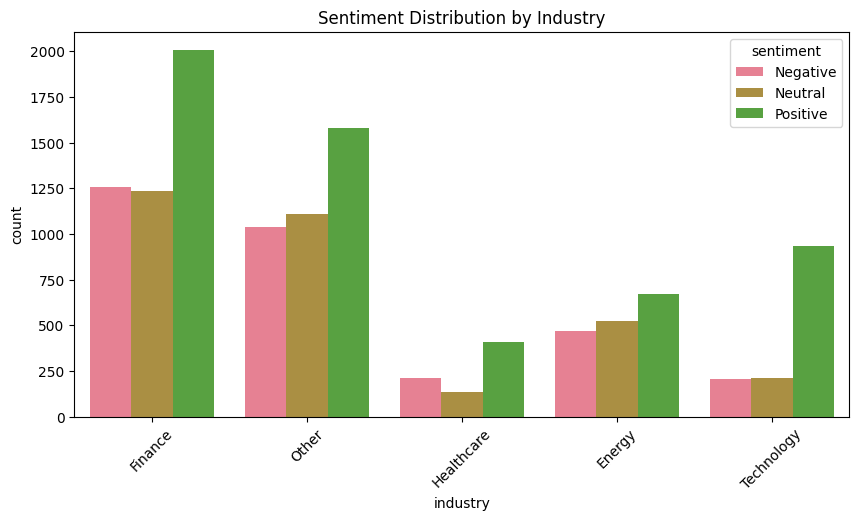

In [ ]:

# Grouped bar chart for sentiment by industry
plt.figure(figsize=(10, 5))
sns.countplot(x='industry', hue='sentiment', data=data)
plt.title('Sentiment Distribution by Industry')
plt.xticks(rotation=45)
plt.show()

Top 10 Unigrams: [('và', 136846), ('các', 107639), ('trong', 93252), ('của', 93079), ('công', 84168), ('với', 83805), ('có', 76692), ('là', 67001), ('cho', 65736), ('đồng', 57747)]
Top 10 Bigrams: [('đầu tư', 31306), ('công ty', 27036), ('doanh nghiệp', 26469), ('thị trường', 25761), ('việt nam', 25003), ('tỷ đồng', 22558), ('phát triển', 19927), ('dự án', 19383), ('so với', 16608), ('có thể', 16431)]


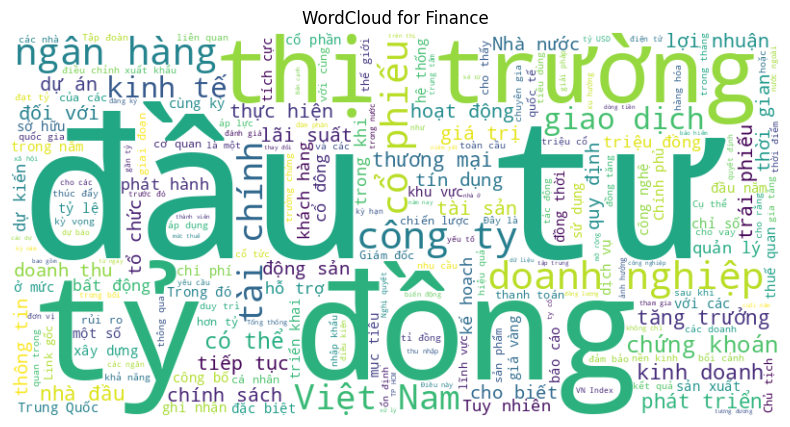

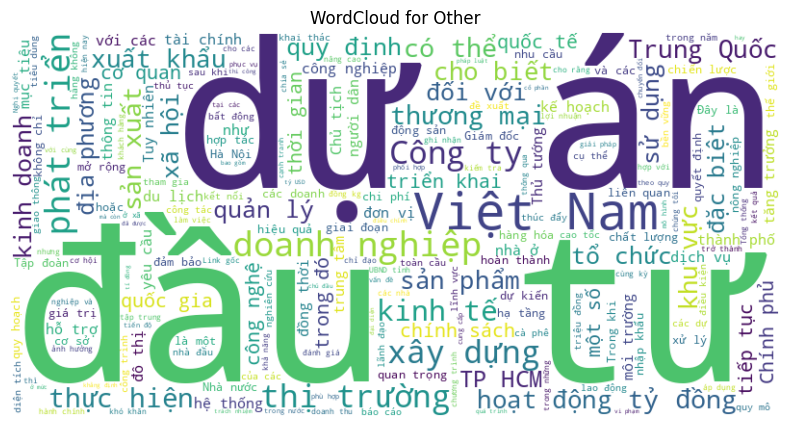

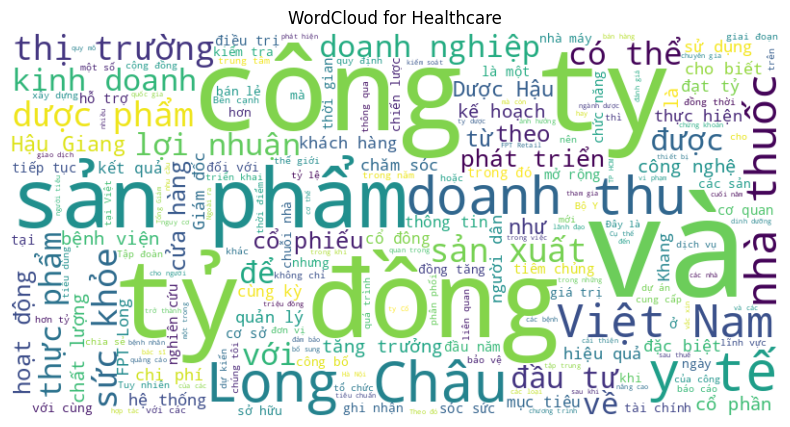

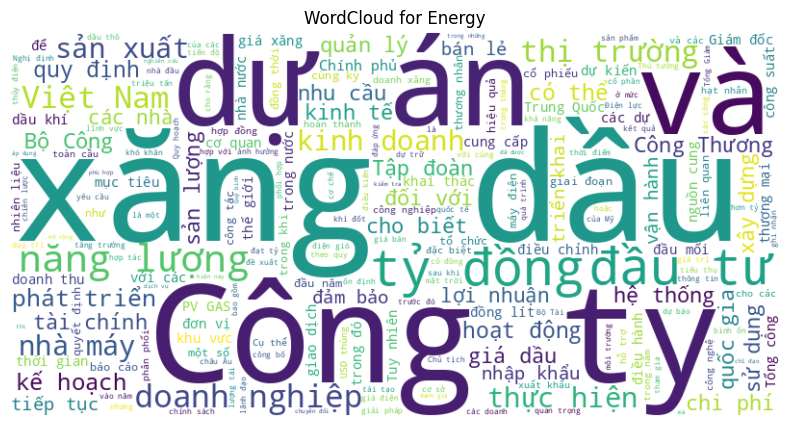

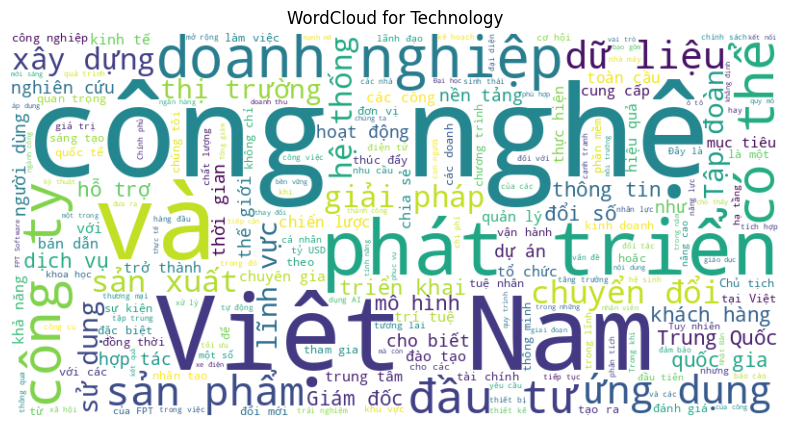

In [ ]:
# 4. Keyword analysis
# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    return text

# Unigram and bigram extraction
def get_ngrams(text, n):
    words = preprocess_text(text).split()
    if n == 1:
        return words
    else:
        return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

all_text = ' '.join(data['content'].dropna())
unigrams = get_ngrams(all_text, 1)
bigrams = get_ngrams(all_text, 2)
print("Top 10 Unigrams:", Counter(unigrams).most_common(10))
print("Top 10 Bigrams:", Counter(bigrams).most_common(10))

# WordCloud for each industry
for industry in data['industry'].unique():
    industry_text = ' '.join(data[data['industry'] == industry]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(industry_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {industry}')
    plt.axis('off')
    plt.show()


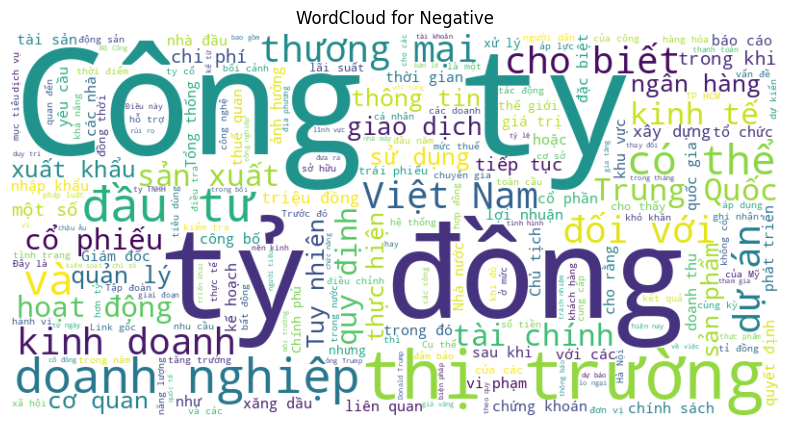

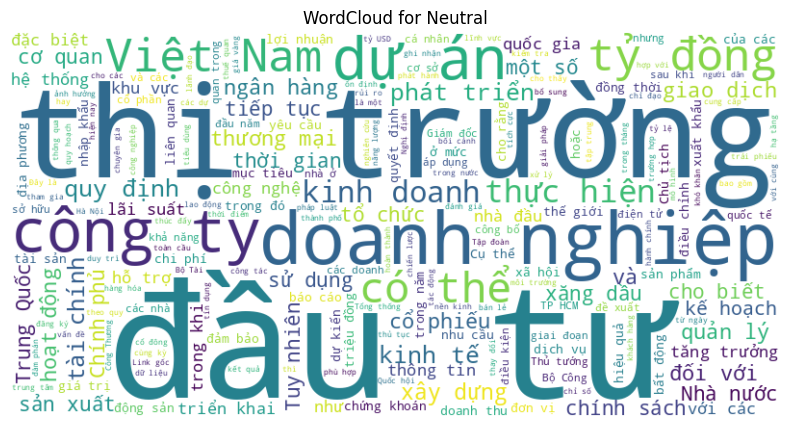

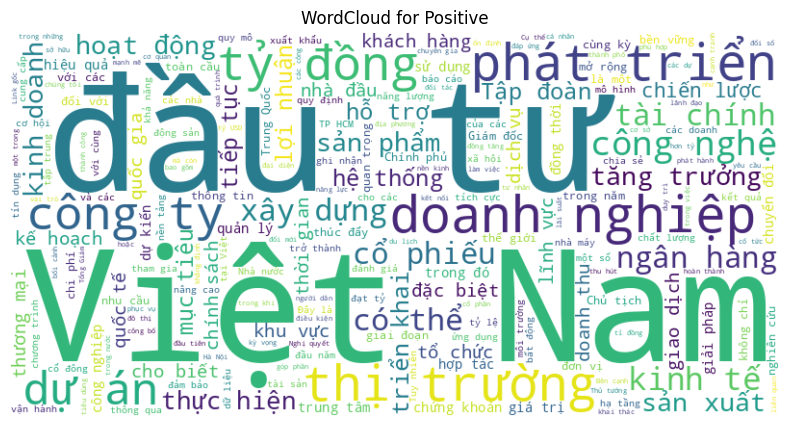

In [ ]:
# WordCloud for each sentiment
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment}')
    plt.axis('off')
    plt.show()


In [ ]:
# 5. Sample examples
print("6. Sample examples representing each industry and sentiment:")
for industry in data['industry'].unique():
    for sentiment in data['sentiment'].unique():
        sample = data[(data['industry'] == industry) & (data['sentiment'] == sentiment)].sample(1)
        if not sample.empty:
            print(f"\nIndustry: {industry}, Sentiment: {sentiment}")
            print(f"Length: {sample['content_length'].iloc[0]} characters")
            print(f"Content: {sample['content'].iloc[0][:200]}...")  # Show first 200 chars
            print(f"Summary: {sample['summary'].iloc[0]}")

6. Sample examples representing each industry and sentiment:

Industry: Finance, Sentiment: Negative
Length: 3725 characters
Content: Nếu không có giải pháp tổng thể, nhiều dự án dở dang sẽ tiếp tục "đắp chiếu" kéo theo hệ lụy cho ngân hàng, nhà đầu tư, người lao động…Đó là lo ngại của ông Lê Hoàng Châu - Chủ tịch Hiệp hội Bất động ...
Summary: Ông Lê Hoàng Châu, Chủ tịch Hiệp hội Bất động sản TP HCM, lo ngại nhiều dự án dở dang sẽ tiếp tục "đắp chiếu", gây hệ lụy cho ngân hàng, nhà đầu tư và người lao động. Dư nợ tín dụng bất động sản tại Việt Nam đang tăng nhanh, với tỉ lệ nợ xấu tăng đáng kể. Các đề xuất giải pháp bao gồm xử lý tài sản bảo đảm, cải thiện hệ thống pháp lý và tăng cường quản lý nợ xấu để phục hồi thị trường. Chuyên gia đề xuất cân bằng quyền thu giữ tài sản giữa ngân hàng và người vay để tối ưu hóa việc xử lý nợ xấu.

Industry: Finance, Sentiment: Neutral
Length: 3473 characters
Content: Đảng bộ Sở Giao dịch Chứng khoán Hà Nội (HNX) đã tổ chức Đại hội Đảng bộ lần thứ 